<a href="https://colab.research.google.com/github/sketchydough/Pytorch-DL-Practice/blob/main/MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#loading MNIST dataset diretly from keras
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.mnist.load_data()

In [11]:
#normalizing images to values between 0 and 1
train_images=train_images /255
test_images= test_images /255

In [12]:
#reshape the images to 28x28x1 (bcoz keras expects 3d input for CNNs)
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

In [14]:
#cnn model
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [18]:
#train the model
model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.8934 - loss: 0.3598
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.9847 - loss: 0.0505
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.9881 - loss: 0.0363
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.9920 - loss: 0.0251
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9941 - loss: 0.0199


In [19]:
#evaluate the model
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f'test accuracy:{test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9870 - loss: 0.0360
test accuracy:99.00%


In [20]:
#check the predictions
predictions=model.predict(test_images)
predicted_digit=np.argmax(predictions[0])
print(f'predicted digit:{predicted_digit}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
predicted digit:7


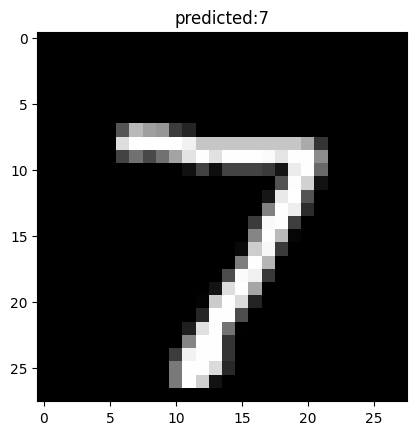

In [21]:
#visualize
plt.imshow(test_images[0].reshape(28,28),cmap='gray')
plt.title(f'predicted:{predicted_digit}')
plt.show()